In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import PySulfSat as ss

In [2]:
sys.path.append(r'G:\My Drive\Berkeley_NEW\MELTS_python_Paula\melts_matlab_git_master\package')

In [3]:
!pip install --upgrade "https://github.com/gleesonm1/pyMELTScalc/archive/refs/tags/v0.0.7.zip"

  Using cached https://github.com/gleesonm1/pyMELTScalc/archive/refs/tags/v0.0.7.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [4]:
import pyMELTScalc as M
M.__version__

'0.0.7'

In [5]:
df_out2=ss.import_data('Glass_input_example.xlsx', sheet_name='Glass_input', 
                       suffix="_Liq", sample_label='Sample_ID_Liq')
df_out2.head()
# Selecting a single composition to start the model from
sample=df_out2.iloc[0]

We have replaced all missing liquid oxides and strings with zeros. 


In [6]:
P=1000
MELTS_FC=M.multi_iso_crystallise(Model = "MELTSv1.0.2", 
                        Fe3Fet_Liq=0.1,
                        comp = sample.to_dict(), 
                        Frac_solid = True, 
                        Frac_fluid = True, 
                        T_start_C = 1200, 
                        T_end_C = 750, 
                        dt_C = 5, 
                        P_path_bar = P, 
                        find_liquidus = True)

In [7]:
MELTS=MELTS_FC['All']

In [8]:
# Lets see what phases we have!
MELTS.columns[MELTS.columns.str.contains('SiO2')]

Index(['SiO2_Liq', 'SiO2_Cpx', 'SiO2_Plag', 'SiO2_Cpx2', 'SiO2_rutile1',
       'SiO2_Sp', 'SiO2_Ol', 'SiO2_whitlockite1'],
      dtype='object')

In [9]:
MELTS.head()

,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,Fe2O3_Liq,...,Na2O_whitlockite1,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1_prop,mass_whitlockite1_prop,v_whitlockite1_prop,rho_whitlockite1_prop
0,1183.300000,1000.0,-1.180231e+06,263.406565,36.469894,50.436352,2.040399,13.134570,0.0,1.470281,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1178.319540,1000.0,-1.182782e+06,261.652227,36.269339,50.400619,2.132021,13.079651,0.0,1.504555,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1173.339080,1000.0,-1.120803e+06,248.027312,34.408849,50.347120,2.248859,12.894563,0.0,1.554907,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1168.358621,1000.0,-1.050379e+06,233.074597,32.336062,50.279685,2.371121,12.701134,0.0,1.609440,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1163.378161,1000.0,-9.853206e+05,219.223435,30.414423,50.194928,2.502151,12.492723,0.0,1.669881,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [10]:
Smythe_CalcSulf=ss.calculate_Smythe2017_SCSS(df=MELTS, 
                                             T_K=MELTS['T_C']+273.15, 
P_kbar=test2['P_bar']/1000, Fe_FeNiCu_Sulf=0.65,
Fe3Fet_Liq=test2['Fe3Fet_Liq'])

Smythe_CalcSulf.head()

NameError: name 'test2' is not defined

In [ ]:
plt.plot(MELTS['MgO_Liq'], Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('SCSS (Smythe, ppm)')

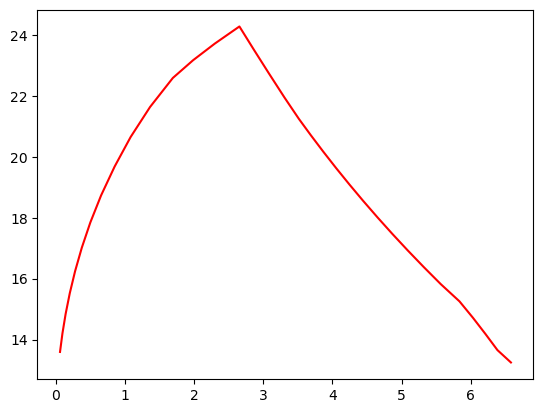

In [12]:
plt.plot( MELTS['MgO_Liq'],MELTS['FeOt_Liq'],
         '-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('Liq FeO (wt%)')